In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
import csv
import math
import pandas as pd
# nicec plot style
plt.style.use('ggplot')

sys.path.insert(0, os.path.abspath('../lib'))
import file_read
import sig_proc as sp

def read_csv(full_path):
    ppg_list = []
    with open(full_path, newline='') as csvfile:
        rows  = csv.reader(csvfile)
        next(rows) #skip header
        for row in rows:
            if row!= []:
                ppg_list.append(float(row[1]))
              
    return ppg_list


def RMS_amp(data):
    squaredData = []
    for val in data:
        squaredData.append(val**2)
    
    ms = np.mean(squaredData)
    rms = math.sqrt(ms)
    return rms

In [2]:
# parameters
sr = 200

PI_LIST= {
    'fileName': [],
    'G_PI': [],
    'R_PI':[],
    'IR_PI':[],
    'G_AC':[],
    'G_DC':[],
    'R_AC':[],
    'R_DC':[],
    'IR_AC':[],
    'IR_DC':[]
}

# DATA_ID = ['none', 'lens', 'lens_97', 'lens_gate', 'lens_rl']
CHANEL = ['ch1', 'ch2', 'ch3']

DATA_ID = ['chestTop', 'chestCenter', 'chestBot', 'finger']

# DATA_ID = ['GLASS97', 'PMMA97', 'PMMA92']
# CHANEL = ['1', '2', '3']

PPG_LIST={head:[] for head in DATA_ID}

for id in DATA_ID:
    PI_LIST['fileName'].append(id)
    for ch in CHANEL:
        
        file_name = id + '_' + ch + '.csv'
        full_path = '../../data/PI_test/AFE4420/placement/' + file_name

        ppg_data = read_csv(full_path)

        PPG_AC = sp.ppg_preprocess(ppg_data, sr, norm=0, flip=0)
        PPG_DC = sp.butter_lowpass_filter(ppg_data, 5, sr, 4)
        
        PI = RMS_amp(PPG_AC/PPG_DC)
        PPG_LIST[id].append(PPG_AC)
        if ch == 'ch1':
            PI_LIST['G_PI'].append(PI)
            PI_LIST['G_AC'].append(RMS_amp(PPG_AC))
            PI_LIST['G_DC'].append(RMS_amp(PPG_DC))

        elif ch == 'ch2':
            PI_LIST['R_PI'].append(PI)
            PI_LIST['R_AC'].append(RMS_amp(PPG_AC))
            PI_LIST['R_DC'].append(RMS_amp(PPG_DC))
        elif ch == 'ch3':
            PI_LIST['IR_PI'].append(PI)
            PI_LIST['IR_AC'].append(RMS_amp(PPG_AC))
            PI_LIST['IR_DC'].append(RMS_amp(PPG_DC))
        

PI_DATAFRAME = pd.DataFrame(PI_LIST)
PI_DATAFRAME

,fileName,G_PI,R_PI,IR_PI,G_AC,G_DC,R_AC,R_DC,IR_AC,IR_DC
0,chestTop,0.000975,0.000281,0.000235,0.000826,0.848161,0.000173,0.617873,0.000183,0.781154
1,chestCenter,0.002548,0.000620,0.000533,0.002213,0.867617,0.000598,0.964116,0.000595,1.117241
2,chestBot,0.000661,0.000217,0.000211,0.000723,1.096496,0.000214,0.978612,0.000246,1.161712
3,finger,0.006342,0.000310,0.000537,0.005935,0.947359,0.000246,0.793265,0.000459,0.854391


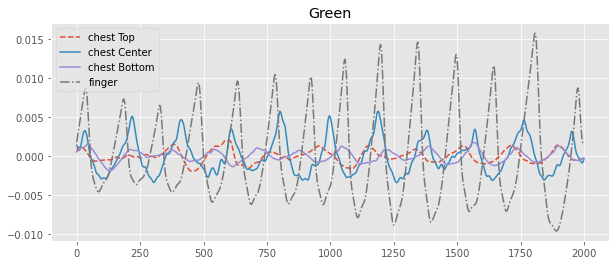

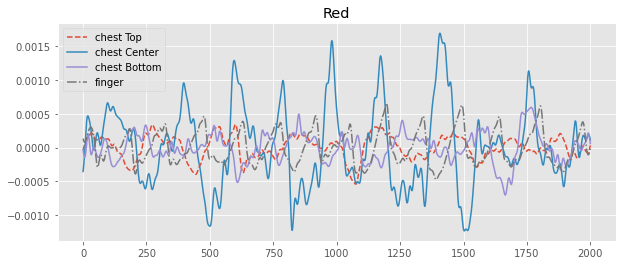

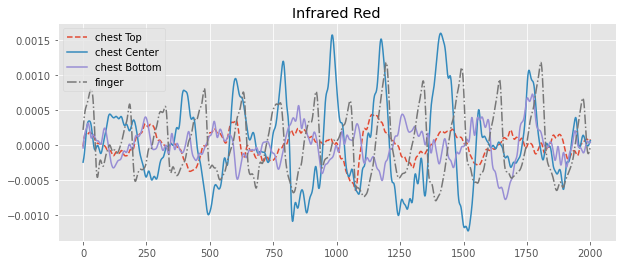

In [13]:
led_list= ['Green', 'Red', 'Infrared Red']
for i in range(3):
    plt.figure(figsize=(10,4))
    plt.title(led_list[i])
    plt.plot(PPG_LIST['chestTop'][i], label='chest Top', ls='--')
    plt.plot(PPG_LIST['chestCenter'][i], label='chest Center')
    plt.plot(PPG_LIST['chestBot'][i], label='chest Bottom')
    plt.plot(PPG_LIST['finger'][i], label='finger', ls='-.')

    plt.legend()


# Placement comparison

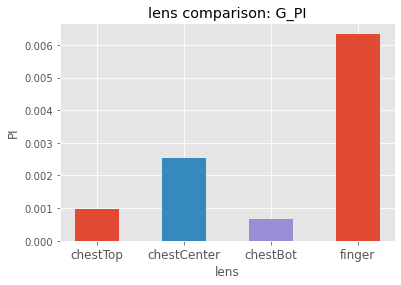

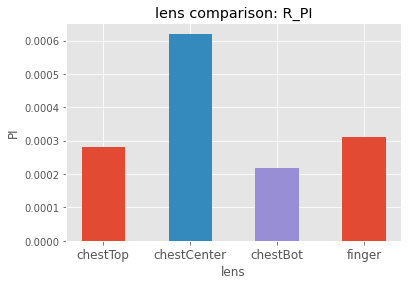

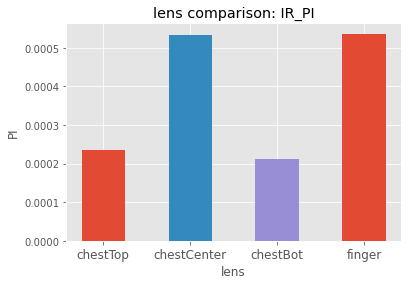

In [10]:
x = np.arange(len(DATA_ID))


for LED in ['G_PI', 'R_PI', 'IR_PI']:
    
    plt.figure()
    plt.bar(x, PI_DATAFRAME[LED], width=0.5, bottom=None, align='center',
            color=[
                '#E24A33', 
                '#348ABD', 
                '#988ED5'])
    plt.xticks(x, DATA_ID, fontsize=12)
    plt.xlabel('lens')
    plt.ylabel('PI')
    plt.title('lens comparison: ' + LED)
    plt.show()
